In [ ]:
# This Script is to first Compute other molecular Properties (features) like Descriptors or Fingerprints
# Check how important these featuers are in seperating molecules based on Activity
# By Ashok K. Sharma
# Date: Aug-11-2024

In [ ]:
#Download PaDEL-Descriptor
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
#! unzip padel.zip

In [1]:
##Load bioactivity data
#Download the curated ChEMBL bioactivity data for TNF-alpha that has been pre-processed from Parts 1 and 2.
#Here we will be using the Set1_MolecularProperties_pIC50.csv file that essentially contains the pIC50 values that we will be using for Multi-variate Statistical Analysis

import pandas as pd    
df = pd.read_csv('/Users/ashoksharma/Work/Python_bioinfo/Disease_target/output/Set1_MolecularProperties_pIC50.csv')
df 

,molecule_chembl_id,canonical_smiles,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0,269.0,6.570248
1,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0,48.0,7.318759
2,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0,928.0,6.032452
3,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0,400.0,6.397940
4,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0,12000.0,4.920819
...,...,...,...,...,...,...,...,...,...,...,...
739,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0,0.0,18.000000
740,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0,870.0,6.060481
741,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0,629.0,6.201349
742,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0,890.0,6.050610


In [2]:
# Get the SMILES for each molecule and save the file in the Current Working Directory
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [3]:
! cat 'molecule.smi' | head -5

CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO)C(=O)NO)C(C)(C)C	CHEMBL306090
CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](CO)C(=O)NO)C(C)(C)C	CHEMBL72511
CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(=O)NO)C(C)(C)C	CHEMBL76297
O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1	CHEMBL11440
COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1	CHEMBL63
cat: stdout: Broken pipe


In [4]:
! cat 'molecule.smi' | wc -l

     744


In [9]:
#Calculate descriptors and/or Fingerprints
#Calculate PaDEL descriptors
# Before that install Java (Arm 64 DMG Installer for macOS) 
# https://www.oracle.com/java/technologies/downloads/#jdk19-mac

! cat "../padel_descriptors.sh"

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/descriptors.xml -dir ./ -file TNF_alpha_descriptors.csv


In [ ]:
# Important Step
# Before that install Java (Arm 64 DMG Installer for macOS) 
# https://www.oracle.com/java/technologies/downloads/#jdk19-mac

In [12]:
# ****Important**** - Need to install Java to run this descritpor calculation script

! bash padel_descriptors.sh # To caclulate Other Descriptors
# To compute Fingerprints use the Respetive file in the sh file For Example
#! bash padel_MACCSF.sh # To calculate MACCSF Descriptors : MACCSFingerprinter.xml

Processing CHEMBL306090 in molecule.smi (1/744). 
Processing CHEMBL76297 in molecule.smi (3/744). 
Processing CHEMBL72511 in molecule.smi (2/744). 
Processing CHEMBL11440 in molecule.smi (4/744). 
Processing CHEMBL63 in molecule.smi (5/744). 
Processing CHEMBL18701 in molecule.smi (6/744). 
Processing CHEMBL169795 in molecule.smi (7/744). 
Processing CHEMBL172619 in molecule.smi (8/744). 
Processing CHEMBL169882 in molecule.smi (9/744). Average speed: 5.16 s/mol.
Processing CHEMBL368515 in molecule.smi (10/744). Average speed: 5.16 s/mol.
Processing CHEMBL170395 in molecule.smi (12/744). Average speed: 5.16 s/mol.
Processing CHEMBL172224 in molecule.smi (14/744). Average speed: 5.19 s/mol.
Processing CHEMBL171179 in molecule.smi (11/744). Average speed: 5.16 s/mol.
Processing CHEMBL263480 in molecule.smi (15/744). Average speed: 5.19 s/mol.
Processing CHEMBL354257 in molecule.smi (13/744). Average speed: 5.16 s/mol.
Processing CHEMBL171406 in molecule.smi (16/744). Average speed: 0.67 

In [13]:
! ls -l

total 5360
drwxr-xr-x   6 ashoksharma  staff      192 Aug 10 12:15 Data
-rw-r--r--   1 ashoksharma  staff    86891 Aug 10 11:54 OLD_Step1_getBioactivity_Data.ipynb
-rw-r--r--   1 ashoksharma  staff   149032 Aug  9 19:58 OLD_Step2_Explore_molecularProperty.ipynb
drwxrwxr-x@ 21 ashoksharma  staff      672 May 30  2020 PaDEL-Descriptor
-rw-r--r--   1 ashoksharma  staff    33029 Aug 10 13:44 Step1_Get_BioactivityData.ipynb
-rw-r--r--   1 ashoksharma  staff  1204520 Aug 10 18:46 Step2_TargetSpecificExploratory_Analysis.ipynb
-rw-r--r--   1 ashoksharma  staff    81392 Aug 12 13:22 Step3_Descriptors_Bioactivity_Association.ipynb
-rw-r--r--   1 ashoksharma  staff   931151 Aug 12 13:21 TNF_alpha_descriptors.csv
-rwx------@  1 ashoksharma  staff   108454 Aug 10 13:16 disease_target.numbers
drwxr-xr-x   8 ashoksharma  staff      256 Aug 10 18:44 figures
drwxr-xr-x   3 ashoksharma  staff       96 Aug 10 13:19 input
-rw-r--r--   1 ashoksharma  staff      124 Aug 10 18:10 mannwhitneyu_LogP.csv
-rw-r

In [25]:
df_descriptors = pd.read_csv('TNF_alpha_descriptors.csv')
df_descriptors = df_descriptors.rename(columns={'Name': 'molecule_chembl_id'}) # Rename CHEMBL Column Name
df_descriptors

,molecule_chembl_id,SubFPC1,SubFPC2,SubFPC3,SubFPC4,SubFPC5,SubFPC6,SubFPC7,SubFPC8,SubFPC9,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,CHEMBL169795,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,8.0,6.0,0.0,0.0,0.0,0.0,9.0
1,CHEMBL306090,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,18.0,11.0,0.0,0.0,0.0,0.0,16.0
2,CHEMBL76297,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,17.0,11.0,0.0,0.0,0.0,0.0,16.0
3,CHEMBL63,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,13.0,4.0,0.0,0.0,0.0,0.0,10.0
4,CHEMBL72511,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,18.0,18.0,12.0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,CHEMBL5268975,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,...,0.0,0.0,7.0,7.0,4.0,2.0,0.0,0.0,0.0,18.0
740,CHEMBL478482,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,...,0.0,0.0,6.0,6.0,4.0,2.0,0.0,0.0,0.0,19.0
741,CHEMBL2316207,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,17.0,17.0,10.0,0.0,0.0,0.0,0.0,31.0
742,CHEMBL4648362,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,23.0,5.0,0.0,0.0,0.0,0.0,20.0


In [26]:
# Join Bioactivity Data with Calculated Descriptors 
df_combined = pd.merge(df, df_descriptors, on='molecule_chembl_id')
df_combined # Now the combined DF file has 10 columns + 308 descriptors

,molecule_chembl_id,canonical_smiles,class,target_name,disease_name,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,...,SubFPC298,SubFPC299,SubFPC300,SubFPC301,SubFPC302,SubFPC303,SubFPC304,SubFPC305,SubFPC306,SubFPC307
0,CHEMBL306090,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(C)cc1)[C@H](CO...,active,TNF-alpha,IBD,379.457,0.46942,5.0,5.0,269.0,...,0.0,0.0,18.0,18.0,11.0,0.0,0.0,0.0,0.0,16.0
1,CHEMBL72511,CNC(=O)[C@@H](NC(=O)[C@H](c1ccc(OC)cc1)[C@H](C...,active,TNF-alpha,IBD,395.456,0.16960,5.0,6.0,48.0,...,0.0,0.0,18.0,18.0,12.0,0.0,0.0,0.0,0.0,16.0
2,CHEMBL76297,CNC(=O)[C@@H](NC(=O)[C@H](c1ccccc1)[C@H](CO)C(...,active,TNF-alpha,IBD,365.430,0.16100,5.0,5.0,928.0,...,0.0,0.0,17.0,17.0,11.0,0.0,0.0,0.0,0.0,16.0
3,CHEMBL11440,O=C1CCC(N2C(=O)c3c(F)c(F)c(F)c(F)c3C2=O)C(=O)N1,active,TNF-alpha,IBD,330.193,0.64420,1.0,4.0,400.0,...,0.0,0.0,7.0,7.0,1.0,0.0,0.0,0.0,0.0,13.0
4,CHEMBL63,COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1,inactive,TNF-alpha,IBD,275.348,2.62010,1.0,3.0,12000.0,...,0.0,0.0,13.0,13.0,4.0,0.0,0.0,0.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,CHEMBL2152944,O=C1c2ccc(Nc3ccc(F)cc3F)cc2CCc2ccc(OC[C@H](O)C...,active,TNF-alpha,IBD,425.431,3.77000,3.0,5.0,0.0,...,0.0,0.0,10.0,10.0,6.0,0.0,0.0,0.0,0.0,21.0
740,CHEMBL4648362,Cc1cc2c(-c3ccco3)cnc(N[C@@H]3CCN(C)C[C@H]3C(=O...,active,TNF-alpha,IBD,463.582,3.67262,3.0,6.0,870.0,...,0.0,0.0,23.0,23.0,5.0,0.0,0.0,0.0,0.0,20.0
741,CHEMBL5268975,COc1cc(/C=C2\CC/C(=C\c3ccccc3C(F)(F)F)C2=O)ccc1O,active,TNF-alpha,IBD,374.358,5.24950,1.0,3.0,629.0,...,0.0,0.0,7.0,7.0,4.0,2.0,0.0,0.0,0.0,18.0
742,CHEMBL5282465,CCOC(=O)C1=C(C)NC2S/C(=C\c3ccc(N4CCOCC4)cc3)C(...,active,TNF-alpha,IBD,497.642,3.96620,1.0,8.0,890.0,...,0.0,0.0,17.0,17.0,6.0,2.0,0.0,0.0,0.0,21.0


In [44]:
# Now let's explore Different Methods to check How well these Descriptors sepearate Active and Inactive TNF-alpha molecules

import os
# Fix the output directory to save the plots
output_dir = '/Users/ashoksharma/Work/Python_bioinfo/Disease_target/figures'
os.makedirs(output_dir, exist_ok=True)

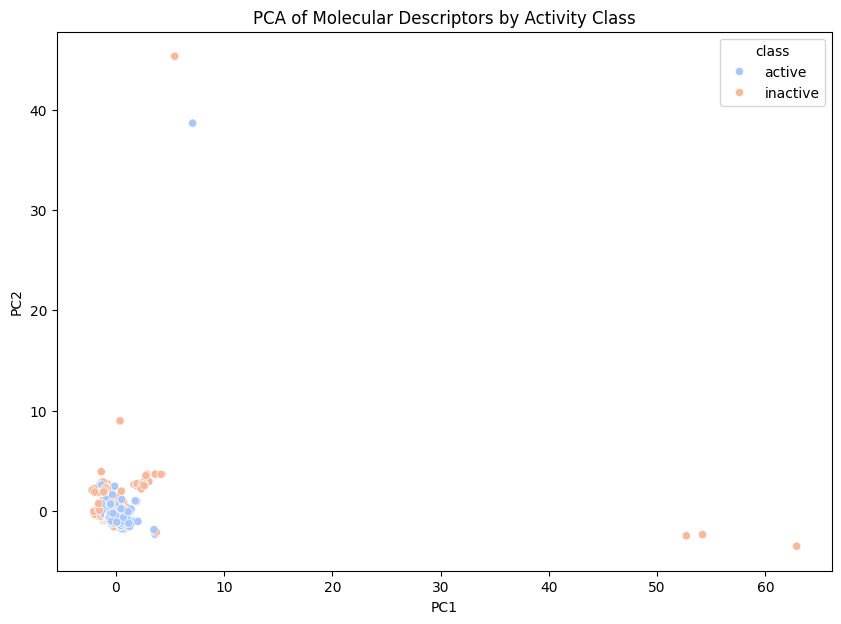

Explained variance by PC1: 0.12
Explained variance by PC2: 0.05


In [45]:
# Analysis1. Ordination Analysis: Principal Component Analysis (PCA)
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Assuming df is your DataFrame with features, 'class', and 'pIC50' columns
#features = [col for col in df.columns if col not in ['class', 'pIC50']]
#X = df[features]

X = df_combined.iloc[:, 11:318]
features = X.columns.tolist() # Get list of Features
y_class = df_combined['class']
y_pIC50 = df_combined['pIC50']

# Standardizing the features
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
df_pca['class'] = y_class

# Plot PCA based on activity class
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=df_pca, palette='coolwarm')
plt.title('PCA of Molecular Descriptors by Activity Class')
# Save the figure to the specified location
output_path = os.path.join(output_dir, 'PCA_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by PC1: {explained_variance[0]:.2f}')
print(f'Explained variance by PC2: {explained_variance[1]:.2f}')

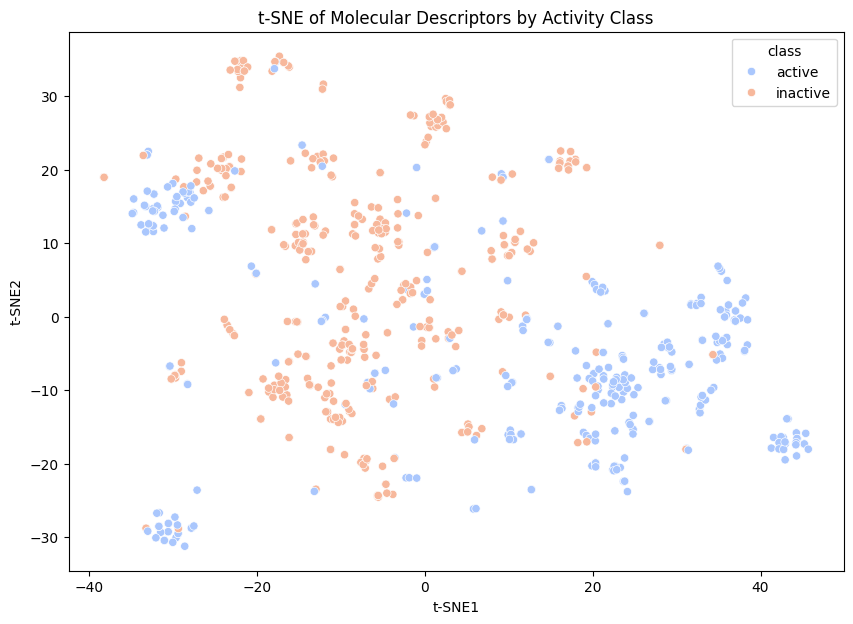

In [46]:
### 2. t-SNE for Visualization

from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_std)
df_tsne = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['class'] = y_class

# Plot t-SNE based on activity class
plt.figure(figsize=(10, 7))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='class', data=df_tsne, palette='coolwarm')
plt.title('t-SNE of Molecular Descriptors by Activity Class')
# Save the figure to the specified location
output_path = os.path.join(output_dir, 'tSNE_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

/var/folders/1y/v_q31vjn0cscx8r6cgykns140000gp/T/ipykernel_30465/596570183.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_features, palette='coolwarm')


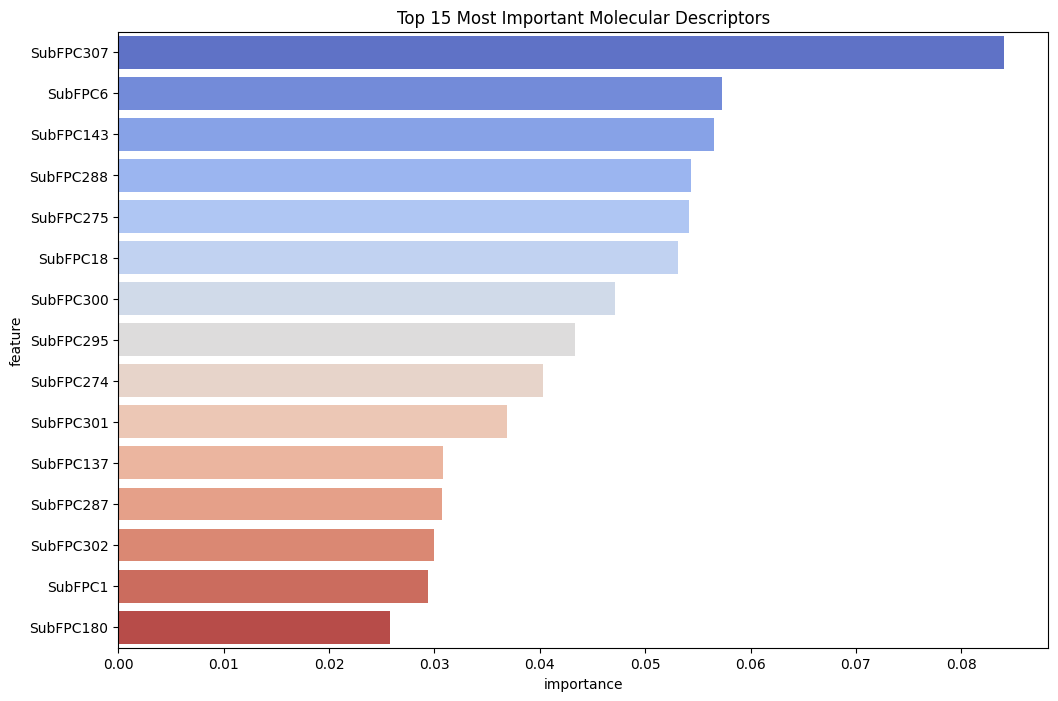

In [47]:
####3. Feature Importance Using Random Forest

from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_std, y_class).feature_importances_

# Get top 10-15 descriptors
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
top_features = feature_importance.sort_values(by='importance', ascending=False).head(15)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features, palette='coolwarm')
plt.title('Top 15 Most Important Molecular Descriptors')
# Save the figure to the specified location
output_path = os.path.join(output_dir, 'varImp_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

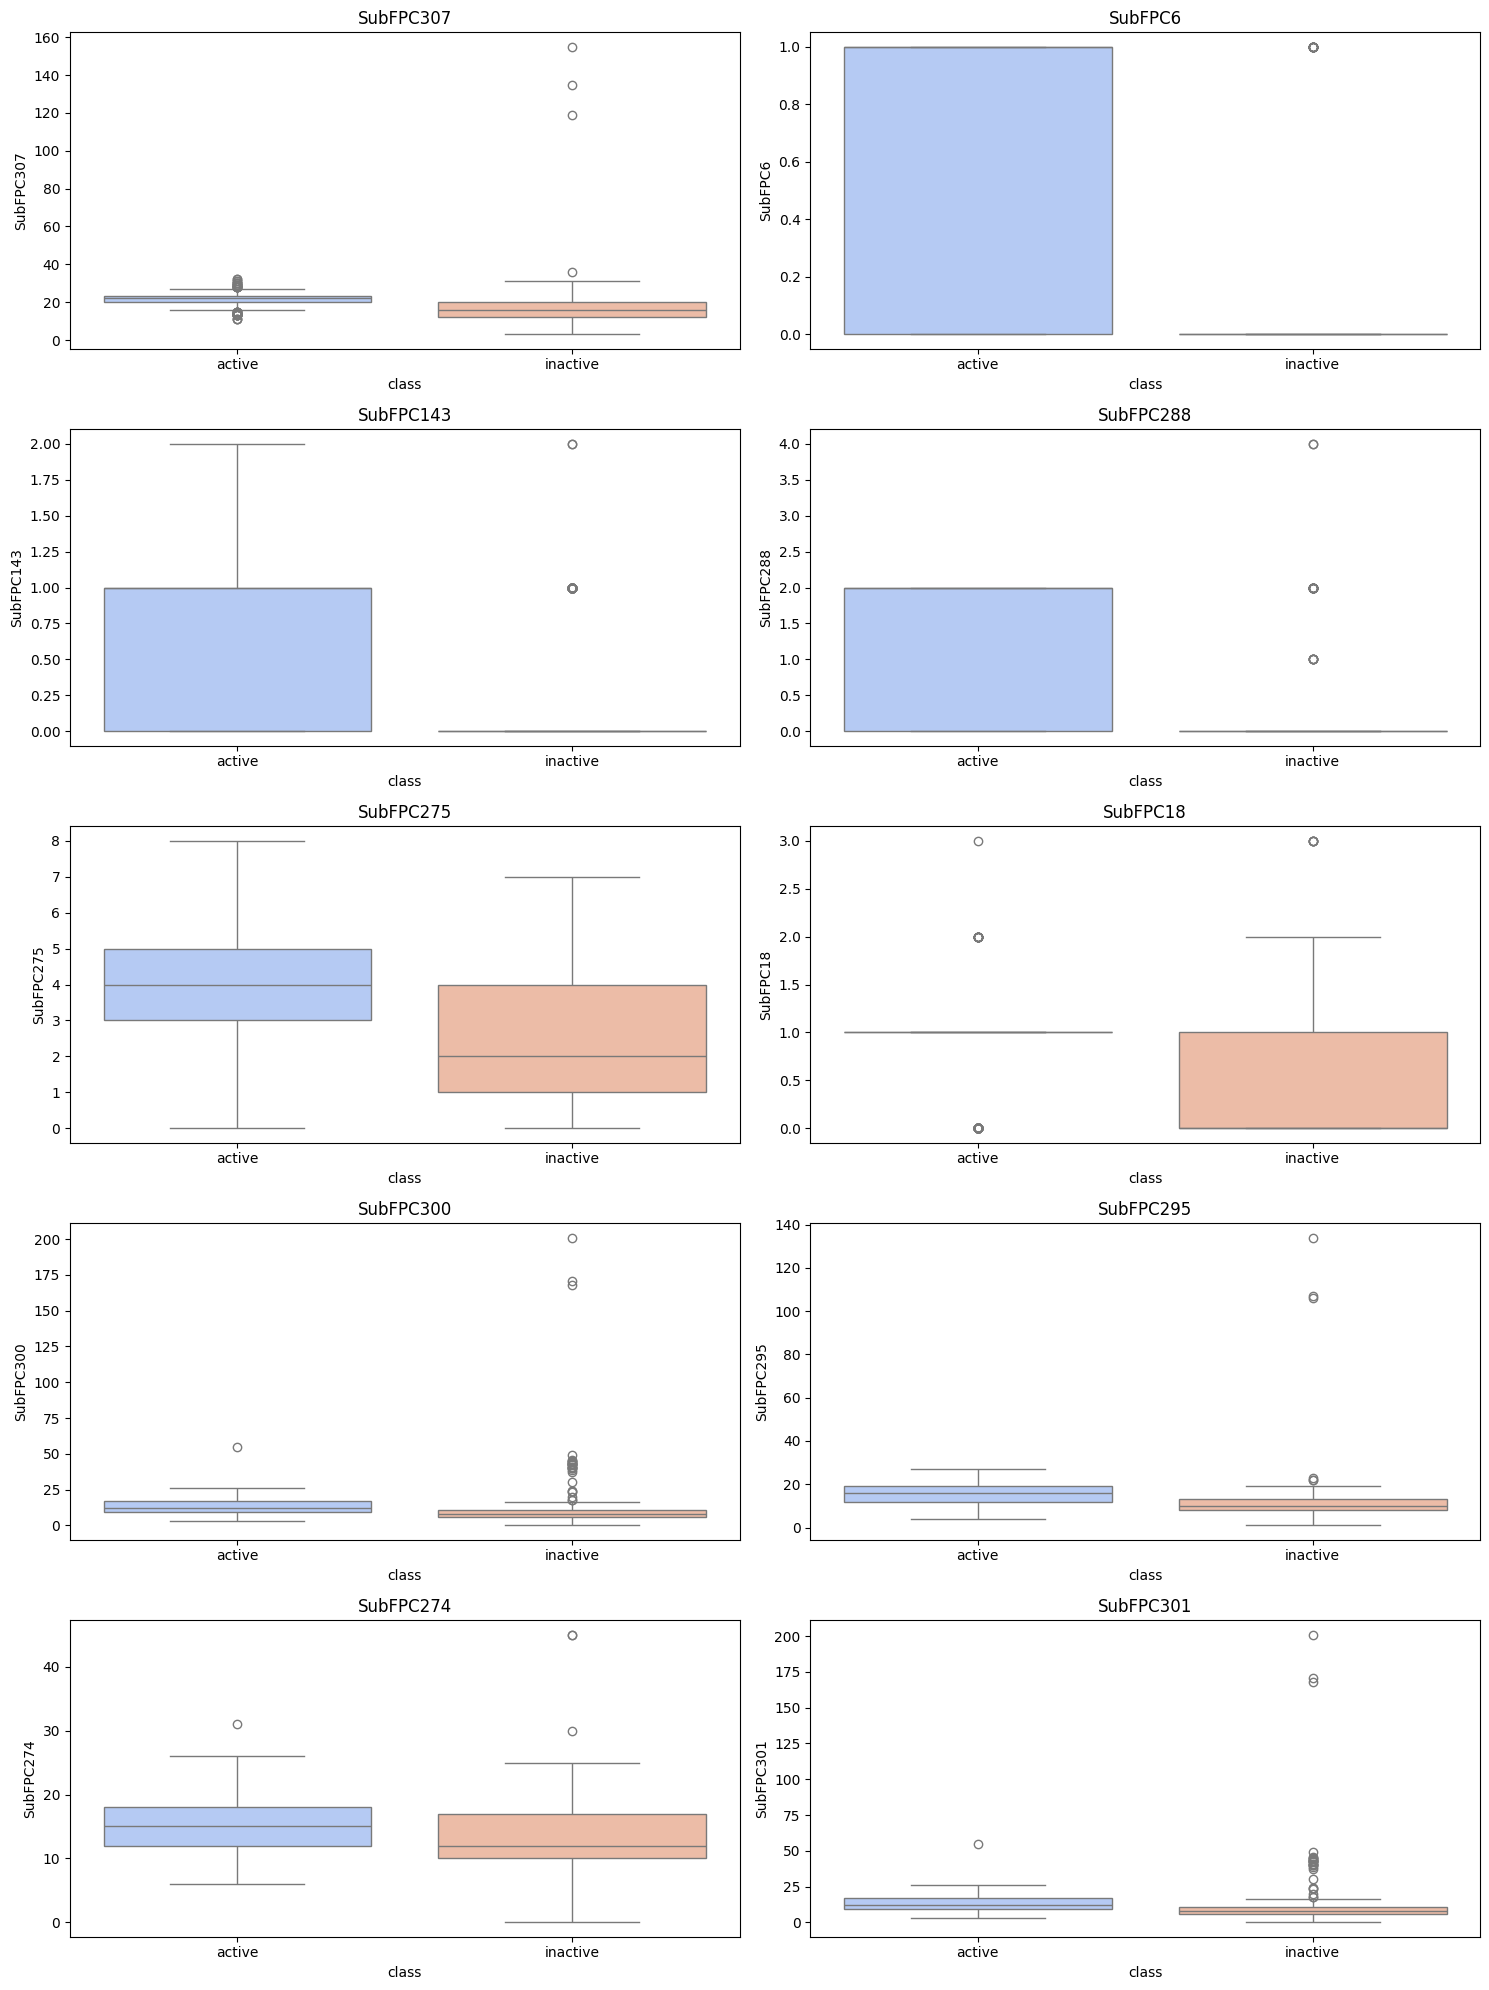

In [48]:
# Get the quick visualization of these top 10 Features
# Get top 10 descriptors based on their importance
top_10_features = top_features['feature'].head(10).tolist()

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

# Set up the figure and axes for the boxplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5 rows, 2 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each of the top 10 features
for i, feature in enumerate(top_10_features):
    sns.boxplot(x='class', y=feature, data=df_combined, palette='coolwarm', ax=axes[i], hue='class', legend=False)
    axes[i].set_title(f'{feature}')

# Adjust layout
plt.tight_layout()
# Save the figure to the specified location
output_path = os.path.join(output_dir, 'VarImp_box_plots_TNF-alpha.png')
plt.savefig(output_path, dpi=300)  # Save with high resolution (300 dpi)
plt.show()

In [ ]:
# The similar exploratory analysis can be done using other Descriptors Also!!
# Repeate this Exercise with Other Descriptors!!!